In [107]:
%matplotlib inline
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import norm
plt.rcParams['font.family']='serif'
plt.rcParams['font.weight']='light'
plt.rcParams['font.size']=14
figsize = (12,8)

Estimated parameters:
[ 5.   0.5  3.   0.1]

Covariance matrix:
[[  4.55019368e-33  -3.97111188e-35   3.34135638e-33  -5.69313719e-34]
 [ -3.97111188e-35   3.28871990e-33  -3.04104275e-33   5.23793684e-34]
 [  3.34135638e-33  -3.04104275e-33   5.98994407e-31  -1.07186710e-31]
 [ -5.69313719e-34   5.23793684e-34  -1.07186710e-31   2.08827305e-32]]



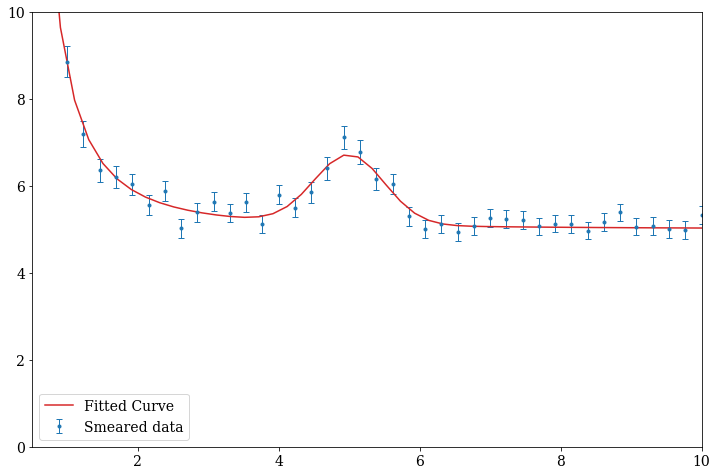

In [142]:
# Define function with parameters
def f(x,p1,p2,p3,p4):
    return 2*norm(p1,p2).pdf(x) + p3/np.power((x-p4),2.) + 5
p1 = 5
p2 = 0.5
p3 = 3
p4 = 0.1
error = 0.04

# Prepare fake data
x = np.linspace(1,10,40)
y = f(x,p1,p2,p3,p4)
yerr = y*error
ysmear = np.random.normal(y,yerr)

# Fit data and generate draw curve
popt, pcov = curve_fit(f,x,y,sigma=yerr,p0=[5,0.4,4,0.2])
xf = np.linspace(0.1,20,100)
yf = f(xf, *popt)
print "Estimated parameters:\n%s\n" %(popt) 
print "Covariance matrix:\n%s\n" %(pcov)

# Plot results
plt.figure(figsize=figsize)
plt.errorbar(x,ysmear,yerr=yerr,fmt='.',color='C0',lw=2,capsize=3,elinewidth=1,label='Smeared data')
plt.plot(xf,yf,color='C3',ls='-',label="Fitted Curve")
plt.legend(loc='best')
plt.xlim(0.5,10)
plt.ylim(0,10)
plt.show()